**Задание 1**

Проанализировать набор данных и ответить на следующие вопросы:

1) Какой % наблюдений выходит за 5 и 95 перцентиль?

2) Какому закону распределения отвечают данные? На основе чего вы так решили?

[Ссылка на данные](https://drive.google.com/file/d/1fc8BGSjDiwbZW6rcr3mMSwAjU2T_BpGW/view?usp=sharing)

Описание данных:

* metrics -- значение определенной метрики в сервисе для пользователя (например, количество кликов). 


*Вместе с ответом на задание приложить код*

In [1]:
import pandas as pd
data = pd.read_csv('test_1_1.csv', sep =';', index_col = 0)

In [2]:
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import norm
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pylab

1) Какой % наблюдений выходит за 5 и 95 перцентиль?

In [3]:
data

,metrics
1,1
2,1
3,4
4,1
5,1
...,...
306835,8
306836,11
306837,1
306838,81


In [4]:
#высчитываем перцентили
alpha_q5, alhpa_q95 = np.percentile(data, [5, 95])
print(alpha_q5)
print(alhpa_q95)

1.0
52.0


In [5]:
#высчитываем процент наблюдений меньше 5 перцентиля 
a = len(data[data['metrics'] < alpha_q5])
b = len(data['metrics'])
a/b*100

0.0

In [6]:
#высчитываем процент наблюдений больше 95 перцентиля
a = len(data[data['metrics'] > alhpa_q95])
a/b*100

4.987306046493438

2) Какому закону распределения отвечают данные? На основе чего вы так решили?

In [7]:
data.metrics

1          1
2          1
3          4
4          1
5          1
          ..
306835     8
306836    11
306837     1
306838    81
306839     1
Name: metrics, Length: 306839, dtype: int64

In [8]:
#найдем среднее и дисперсию
mean = np.mean(data['metrics'])
var = np.std(data['metrics'])
print('maean =', mean)
print('var =', var**2)

maean = 10.146275408276
var = 511.9965640636836


In [9]:
#выкинем выбросы
data_new11 = data[data['metrics'] < mean + 3*var]
data_new11 = data_new11[data_new11['metrics'] > mean - 3*var]

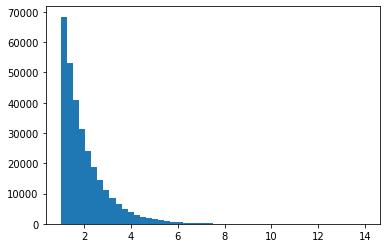

In [10]:
#создаем экспоненциальное распределение
from scipy.stats import expon
r = expon.rvs(size=299436) + 1
plt.hist(r, bins = 50)
plt.show()

In [11]:
from scipy.stats import logistic,uniform,norm,pearsonr, gamma
pearsonr(r, data_new11['metrics'])

(-0.00041331433564422386, 0.8210709515385213)

In [12]:
pearsonr(r, data_new11['metrics'])

(-0.00041331433564422386, 0.8210709515385213)

Распределение экспоненциально

**Задание 2**

Определить, можно сравнить две представленные выборки t критерием Стьюдента? 

Если нельзя сравнивать t-критерием, то что будем использовать и почему?

Ответ аргументировать и описать 

[Ссылка на данные](https://drive.google.com/file/d/1blvC6TEBWghhVMexjOdoGEjzhZZh3wSy/view?usp=sharing)

Описание данных: 

* variant -- вариация в А/Б тесте (либо группа А -- например, сайт без изменений. Либо группа Б -- сайт с изменениями)
* metrics -- значение определенной метрики в сервисе для пользователя (например, количество кликов). 

*Вместе с ответом на задание приложить код*

In [13]:
import pandas as pd
data2 = pd.read_csv('test_1_2 (1).csv', sep =';', index_col = 0)

In [14]:
data2

,variant,metrics
1,A,1
2,B,1
3,A,4
4,B,37
5,B,4
...,...,...
184200,A,12
184201,A,8
184202,B,11
184203,B,81


In [15]:
dataA = data2[data2.variant=='A']
dataB = data2[data2.variant=='B']

In [16]:
dataA

,variant,metrics
1,A,1
3,A,4
8,A,15
10,A,1
12,A,10
...,...,...
184195,A,4
184196,A,1
184200,A,12
184201,A,8


In [17]:
dataB

,variant,metrics
2,B,1
4,B,37
5,B,4
6,B,1
7,B,3
...,...,...
184197,B,1
184198,B,37
184199,B,2
184202,B,11


Для использования t критерия стьюдента нам необходима полная гомогенность и нормальность выборки. Проверим выполнение этих условий

In [18]:
print(len(dataA))
print(len(dataB))

92686
91518


Количество наблюдений в выборках не равно => выборка не гомогенна

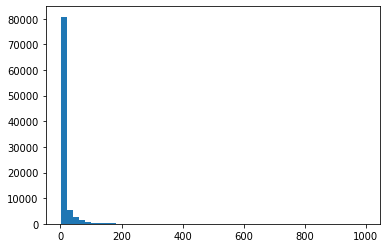

In [19]:
plt.hist(dataA ['metrics'], bins = 50)
plt.show()

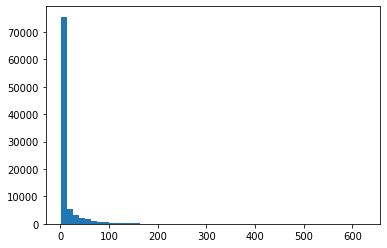

In [20]:
plt.hist(dataB ['metrics'], bins = 50)
plt.show()

На нормальное не похоже, но проверим тестом Харке-Бера, так как он подходит для больших выборок

In [21]:
stats.jarque_bera(dataA.metrics)

(26012586.81019765, 0.0)

In [22]:
stats.jarque_bera(dataB.metrics)

(6573601.726257152, 0.0)

In [23]:
stats.kstest(dataA['metrics'], 'norm'), stats.kstest(dataB['metrics'], 'norm')

(KstestResult(statistic=0.8413447460685429, pvalue=0.0),
 KstestResult(statistic=0.8413447460685429, pvalue=0.0))

P-value во всех случаях равен 0 => выборки имеют не нормальное распределение

Проведем альтернативные тесты: Манна-Уитни и Крускала

In [24]:
stats.kruskal(dataA['metrics'], dataB['metrics'])

KruskalResult(statistic=17.596351848720612, pvalue=2.7311177113963818e-05)

In [25]:
stats.mannwhitneyu(dataA.metrics, dataB.metrics)

MannwhitneyuResult(statistic=4195358346.0, pvalue=1.365559131227319e-05)

P-value<0.05 => Выборки A и B имеют различия

**Задание 3**

Дано две выборки по А/Б тесту.

Две выборки несбалансированные - кол-во пользователей в каждой группе разные.

Метрика, которую меряем в эксперименте (и которую используем для определения группы, которая лучше себя показала) - кол-во просмотренных страниц на пользователя 

Как вы будете принимать решение, какая группа лучше А или Б, и какие статистические методы (критерии) вы будете использовать, какие преобразования к данным применять? P.S. Вам может помочь лекция Виталия Черемисинова, где он рассказывал про А/Б тесты

[Ссылка на данные](https://drive.google.com/file/d/1_g7Dw7-8QzTS47D6GNKMb0FzqMAWBDba/view?usp=sharing)

Описание данных: 

* variant -- вариация в А/Б тесте (либо группа А -- например, сайт без изменений. Либо группа Б -- сайт с изменениями)
* metrics -- значение определенной метрики в сервисе для пользователя (например, количество кликов). 


*Вместе с ответом на задание приложить код*

In [26]:
data3 = pd.read_csv('test_1_3.csv', sep =';', index_col = 0)

In [27]:
data3A = data3[data3.variant=='A']
data3B = data3[data3.variant=='D']

((array([-4.32932312, -4.12981686, -4.02127745, ...,  4.02127745,
          4.12981686,  4.32932312]),
  array([  1,   1,   1, ..., 501, 628, 998])),
 (15.163933878292891, 10.09956196189285, 0.6555644365449642))

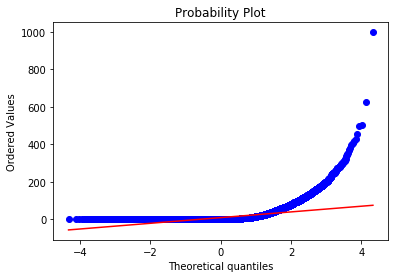

In [28]:
stats.probplot(data3A['metrics'], dist=stats.norm, plot=pylab)

((array([-3.91623879, -3.69681999, -3.57661326, ...,  3.57661326,
          3.69681999,  3.91623879]),
  array([  1,   1,   1, ..., 311, 314, 406])),
 (14.663561282268196, 9.942386297281512, 0.6724147843171323))

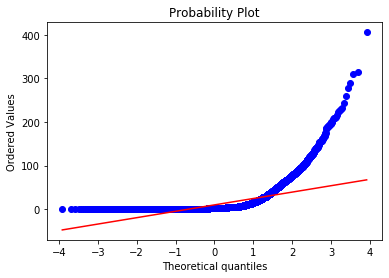

In [29]:
stats.probplot(data3B['metrics'], dist=stats.norm, plot=pylab)

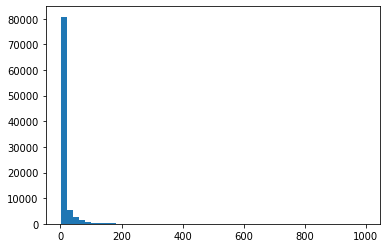

In [30]:
plt.hist(data3A ['metrics'], bins = 50)
plt.show()

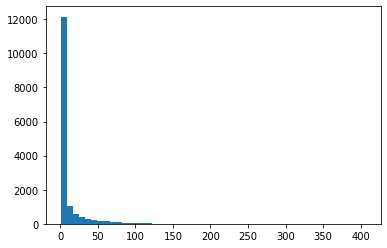

In [31]:
plt.hist(data3B ['metrics'], bins = 50)
plt.show()

Графически кажется, что выборки A и B не имеют значительных отличий. Проверим с помощью теста Колмагорова-Смирнова и Крускала. Бутстрап работает только для небольших выборок, поэтому его не используем

In [32]:
stats.ks_2samp(data3A.metrics, data3B.metrics)

Ks_2sampResult(statistic=0.009140002403439484, pvalue=0.21954502671938858)

In [33]:
stats.kruskal(data3A.metrics, data3B.metrics)

KruskalResult(statistic=1.446344604147111, pvalue=0.22911539853786028)

Попробуем преобразовать логарифмированием

In [34]:
data3Aln = np.log(data3A.metrics)
data3Bln = np.log(data3B.metrics)

In [35]:
stats.ks_2samp(data3Aln, data3Bln)

Ks_2sampResult(statistic=0.009140002403439484, pvalue=0.21954502671938858)

In [36]:
stats.kruskal(data3Aln, data3Bln)

KruskalResult(statistic=1.446344604147111, pvalue=0.22911539853786028)

P-value>0.05 => Выборки различаются незначительно, могли быть взяты из одного распределения

**Задание 4**

Есть данные с большой дисперсии у метрики (диспресию метрики можно посчитать для каждой группы). Для их дальнейшего анализа дисперсию необходимо сократить. Как определить, что дисперсия действительно большая? Если она большая, как вы будете ее чистить? Ответ аргументировать и описать.  P.S. Вам может помочь лекция Виталия Черемисинова, где он рассказывал про А/Б тесты

Описание данных: 

* metrics -- значение определенной метрики в сервисе для пользователя (например, количество кликов). 

[Ссылка на данные](https://drive.google.com/file/d/1fc8BGSjDiwbZW6rcr3mMSwAjU2T_BpGW/view?usp=sharing)

*Вместе с ответом на задание приложить код*

In [37]:
data4 = pd.read_csv('test_1_1.csv', sep =';', index_col = 0)

In [58]:
data4

,metrics
1,1
2,1
3,4
4,1
5,1
...,...
306835,8
306836,11
306837,1
306838,81


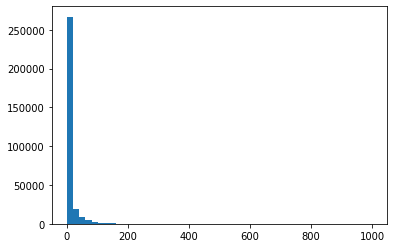

In [38]:
#рассмотрим гистограму распределения выборки
plt.hist(data4['metrics'], bins=50)
plt.show()

In [39]:
#найдем среднее и дисперсию
mean = np.mean(data4['metrics'])
var = np.std(data4['metrics'])
print('maean =', mean)
print('var =', var**2)

maean = 10.146275408276
var = 511.9965640636836


Видим, что при относительно небольшом среднем мы имеем высокую дисперсию => воспользуемся различными методами дляя ее уменьшения

1) Исключение выбросов

In [40]:
data_new = data4[data4['metrics'] < mean + 3*var]
data_new = data_new[data_new['metrics'] > mean - 3*var]

In [41]:
len(data)- len(data_new)

7403

In [42]:
mean_new = np.mean(data_new['metrics'])
var_new = np.std(data_new['metrics'])
print('maean =', mean_new)
print('var =', var_new**2)

maean = 7.472999238568509
var = 176.6934860832005


После исключения выбросов дисперсия выборки упала до 176

2) Логорифмирование

In [43]:
data_new_2 = np.log(data4)

In [44]:
mean_new_2 = np.mean(data_new_2['metrics'])
var_new_2 = np.std(data_new_2['metrics'])
print('maean =', mean_new_2)
print('var =', var_new_2**2)

maean = 1.1532095264289957
var = 1.819212577501802


При логарифмировании дисперсия падает до 1.8, но и среднее сильно снижается

3) Трансформация тестом Бокса-Кокса. Находим оптимальное lambda с помощью stats.boxcox

In [45]:
data4_new_3 = stats.boxcox(data4['metrics'])
data4_new_3[1]

-0.488035148349584

Используя lmbda = -0.48803515, применяем трансформацию

In [46]:
data_bc = stats.boxcox(data.metrics, lmbda = data4_new_3[1])

In [47]:
mean_new_3 = np.mean(data_bc)
var_new_3 = np.std(data_bc)
print('maean =', mean_new_3)
print('var =', var_new_3**2)

maean = 0.6640930654380169
var = 0.4341617960241314


Дисперсия упала до 0.43, а среднее до 0.66

**Задание 5**

Есть эксперимент с поисковыми подсказками. Вы хотим узнать, как изменился CTR в каждой группе эксперимента.

**Данные**

- id - уникальный идентификатор пользователя
- action -
- view - кол-во просмотров на одну сессию
- variant - вариант a/b теста, где 0 - это версия "A", 1 -  версия "B".

**Задача**

- сформировать метрику для оценки эксперимента
- подобрать критерий под особенности данных
- сделать вывод о значимости эффекта

**Данные** 

[Ссылка на данные](https://www.dropbox.com/s/fdki267uilkfq7l/task5.csv)

In [48]:
data5 = pd.read_csv('task5.csv', sep =',', index_col = 0)

Создаем метрику ctr = actions / view

In [49]:
data5['ctr'] = (data5['action']/data5['view'])

In [50]:
# разделяем на две группы
data5A = data5[data5.variant=='A']
data5B = data5[data5.variant=='B']

In [51]:
data5A

,variant,view,action,ctr
id,,,,
88258,A,10,2,0.200000
109938,A,3,1,0.333333
117644,A,7,5,0.714286
374080,A,9,9,1.000000
662082,A,1,1,1.000000
...,...,...,...,...
8356720,A,1,1,1.000000
8360750,A,1,1,1.000000
8382142,A,1,1,1.000000


Проверим на нормальность визуально и с помощью теста Харке-Бера

((array([-3.61671784, -3.38024135, -3.24984825, ...,  3.24984825,
          3.38024135,  3.61671784]),
  array([0.06666667, 0.06666667, 0.06666667, ..., 1.        , 1.        ,
         1.        ])),
 (0.2626544783901927, 0.7615838991498785, 0.8785330073753023))

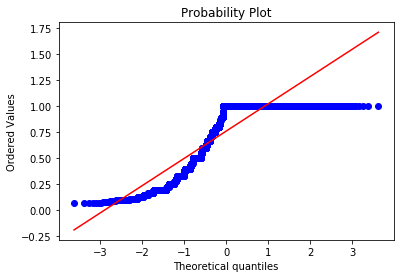

In [52]:
stats.probplot(data5A['ctr'], dist=stats.norm, plot=pylab)

((array([-3.54607291, -3.30518817, -3.17213176, ...,  3.17213176,
          3.30518817,  3.54607291]),
  array([0.05882353, 0.06666667, 0.06666667, ..., 1.        , 1.        ,
         1.        ])),
 (0.26558928576914426, 0.756497644163971, 0.8830226380622282))

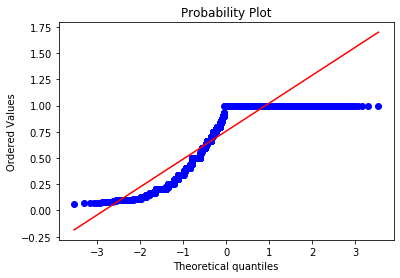

In [53]:
stats.probplot(data5B['ctr'], dist=stats.norm, plot=pylab)

In [54]:
stats.jarque_bera(data5A['ctr'])

(661.070456887029, 0.0)

In [55]:
stats.jarque_bera(data5B['ctr'])

(492.89850619446054, 0.0)

И визуально и с помощью тестов ясно, что распределение не нормальное (p-value < 0.05)

Проверим схожесть выборок с помощью теста Крускала и Колмагорова-Смирнова

In [56]:
stats.kruskal(data5A.ctr, data5B.ctr)

KruskalResult(statistic=0.8481006229795939, pvalue=0.35709021817138975)

In [57]:
stats.ks_2samp(data5A.ctr, data5B.ctr)

Ks_2sampResult(statistic=0.01283722534269739, pvalue=1.0)

P-value>0.05 => выборки схожи, А/B тест не дал результатов